In [1]:
import scipy.io
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

import tensorflow as tf

import keras
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Dense, Activation, Dropout, Flatten, Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Activation
from keras.layers import Conv2D, AveragePooling2D
from keras.models import Model, Sequential

In [2]:
def loadVggFaceModel():
	model = Sequential()
	model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
	model.add(Convolution2D(64, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(64, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(128, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(128, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(256, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(256, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(256, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(Convolution2D(4096, (7, 7), activation='relu'))
	model.add(Dropout(0.5))
	model.add(Convolution2D(4096, (1, 1), activation='relu'))
	model.add(Dropout(0.5))
	model.add(Convolution2D(2622, (1, 1)))
	model.add(Flatten())
	model.add(Activation('softmax'))
	
	return model


def ageModel():
	model = loadVggFaceModel()
	
	base_model_output = Sequential()
	base_model_output = Convolution2D(101, (1, 1), name='predictions')(model.layers[-4].output)
	base_model_output = Flatten()(base_model_output)
	base_model_output = Activation('softmax')(base_model_output)
	
	age_model = Model(inputs=model.input, outputs=base_model_output)
	age_model.load_weights("../../models/age_model_weights.h5")
	return age_model

In [3]:
age_model = ageModel()

In [8]:
# testing age model on image
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

def loadImage(filepath):
    test_img = image.load_img(filepath, target_size=(224, 224))
    plt.imshow(test_img)
    plt.show()
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis = 0)
    test_img /= 255
    return test_img

# age model has 101 outputs and its outputs will be multiplied by its index label.
# sum will be apparent age
output_indexes = np.array([i for i in range(0, 101)])

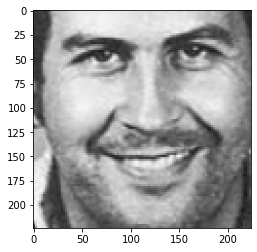

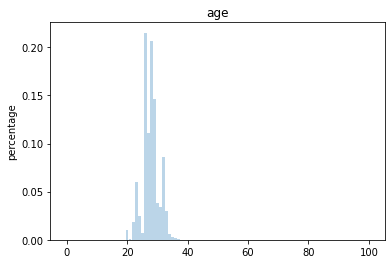

most dominant age:  26
apparent age:  28


In [9]:
img = loadImage('dataset/pablo.png')

age_distributions = age_model.predict(img)

y_pos = np.arange(101)
plt.bar(y_pos, age_distributions[0], align='center', alpha=0.3)
plt.ylabel('percentage')
plt.title('age')
plt.show()

print("most dominant age: ",np.argmax(age_distributions))

apparent_age = np.round(np.sum(age_distributions * output_indexes, axis = 1))
print("apparent age: ", int(apparent_age[0]))